In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from data_prep.prepare import PrepareData

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

path = r'C:\Users\jthan\OneDrive\Desktop\2023\PP\ElectionSL\data\final.csv'

df = pd.read_csv(path, index_col=0).reset_index()
print(df.shape)

df_copy = df.copy()

(3113, 45)


In [2]:
drop_columns = ['2016_winner', 'FIPS', 'Code', 'Population', 'DEM_per', 'REP_per', 'OTH_per', 'fips_x', 'county', 'state_abbr', 'state', 'fips_y']

df.drop(drop_columns, axis=1, inplace=True)

columns_with_nan = df.columns[df.isna().any()].tolist()

df = df.drop(columns_with_nan, axis=1)

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()

df_train, df_test = train_test_split(df, test_size=0.4, shuffle=True, random_state=42)

# split train data set
X_train = df_train.loc[:, df_train.columns != '2020_winner']
y_train = df_train['2020_winner']

# encode y 
encoded_y_train = label_encoder.fit_transform(y_train)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))

# split test data set
X_test = df_test.loc[:, df_test.columns != '2020_winner']
y_test = df_test['2020_winner']

# encode y 
encoded_y_test = label_encoder.fit_transform(y_test)

X_train.head()

,index,per_hs,per_coll,per_grad,EST_RACE_T_POP_One_race_White,EST_RACE_T_POP_One_race_AA,EST_RACE_T_POP_One_race_AI,EST_RACE_T_POP_One_race_Asian,"Percent_CITIZEN,_VOTE,_18_and_over_POP","Percent_CITIZEN,_VOTE,_18_and_over_POP_Male","Percent_CITIZEN,_VOTE,_18_and_over_POP_Female",EST_Percent_T_POP_AGE_20_to_24_years,EST_Percent_T_POP_AGE_25_to_29_years,EST_Percent_T_POP_AGE_35_to_39_years,EST_Percent_T_POP_AGE_40_to_44_years,EST_Percent_T_POP_AGE_45_to_49_years,EST_Percent_T_POP_AGE_50_to_54_years,EST_Percent_T_POP_AGE_55_to_59_years,EST_Percent_T_POP_AGE_60_to_64_years,EST_Percent_T_POP_AGE_65_to_69_years,EST_Percent_T_POP_AGE_70_to_74_years,EST_Percent_T_POP_AGE_75_to_79_years,EST_Percent_T_POP_AGE_80_to_84_years,EST_Percent_T_POP_AGE_85_YO,EST_HH_Mean_income_(dollars),MOE_HH_Mean_income_(dollars),EST_T_CE_POP_16_YO,EST_T_PERCENT_ALLOCATED_Occupation
503,503,37.2155,40.5423,4.9494,17905,7285,164,105,19999,46.5,53.5,5.8,7.1,5.3,7.2,5.9,6.8,7.5,6.7,6.3,4.3,3.5,1.9,2.4,53108,3007,10885,13.8
1321,1321,37.8257,50.8550,4.7842,6347,37,15,59,5260,49.6,50.4,4.5,4.0,4.3,4.6,5.3,6.0,8.4,8.3,8.0,5.0,5.2,3.6,5.3,74952,4376,3288,7.4
2314,2314,36.7376,44.8014,7.7078,46366,15566,213,210,49969,47.5,52.5,5.2,6.1,5.6,5.8,6.3,6.9,6.9,7.4,6.7,4.7,3.4,2.0,1.8,65336,2541,28160,13.3
2862,2862,30.4059,52.6105,6.7451,22326,12254,208,588,29522,54.6,45.4,6.2,7.5,8.2,7.0,5.8,6.5,6.1,6.2,5.1,3.4,2.6,1.5,1.3,92280,5617,15111,16.9
1340,1340,27.2466,56.9598,7.9088,54943,682,228,277,45032,49.9,50.1,4.9,4.5,5.0,5.1,4.9,6.6,8.1,8.2,7.6,5.6,4.0,3.2,3.6,76115,2247,28521,10.2


## first model

In [4]:
import time
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

knn = KNeighborsClassifier(
)

knn.fit(X_train, encoded_y_train)

end = time.time()
true_time = end - start

print('Time to train model: ', true_time)

Time to train model:  0.0009949207305908203


In [5]:
from sklearn.metrics import f1_score

start = time.time()

y_pred = knn.predict(X_test)

end = time.time()
true_time = end - start

print(f"Prediction time: {true_time} seconds")
f1_score(encoded_y_test, y_pred)
print(f"F1 score: {round(f1_score(encoded_y_test, y_pred), 4)*100}%")

Prediction time: 0.23175382614135742 seconds
F1 score: 93.13%


In [6]:
from sklearn.model_selection import cross_validate

decision_tree_result = cross_validate(knn, X_train, encoded_y_train, scoring="f1", cv=5)

print(decision_tree_result['test_score'])
print(f"avg score: {round(decision_tree_result['test_score'].mean()*100, 4)}%")

[0.92260062 0.93146417 0.93228346 0.91472868 0.91446345]
avg score: 92.3108%


[[0.91472868 0.92780338 0.92331288 0.90992366 0.918429  ]
 [0.92944785 0.92592593 0.93066256 0.92189893 0.91212121]
 [0.92307692 0.92735703 0.92690513 0.92260062 0.91981846]
 [0.92307692 0.91614907 0.92355694 0.92260062 0.91603053]
 [0.92236025 0.92355694 0.92667707 0.92615385 0.91908397]
 [0.91950464 0.93001555 0.93023256 0.92569659 0.91525424]
 [0.92068429 0.92713178 0.93125    0.92713178 0.91358025]
 [0.92546584 0.93023256 0.93416928 0.92713178 0.91162791]
 [0.92093023 0.93478261 0.93396226 0.91950464 0.91331269]
 [0.92260062 0.93146417 0.93228346 0.91472868 0.91446345]]


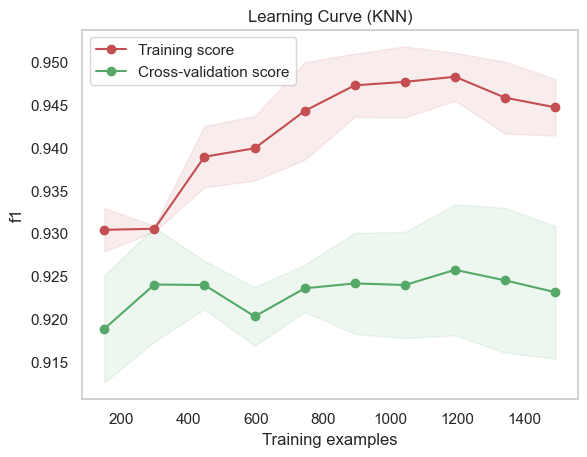

In [7]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
        knn, X_train, encoded_y_train, cv=None, n_jobs=10,scoring="f1", train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
sns.set(style="whitegrid")
plt.title("Learning Curve (KNN)")

plt.xlabel("Training examples")
plt.ylabel("f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1,
                color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score")

plt.legend(loc="best")

print(test_scores)
plt.show()

precision: 90.56776556776556 = 989/989 + 103
recall: 95.83333333333334 = 989/989 + 43
--------------------------------------------------
{'Biden': 0, 'Trump': 1}


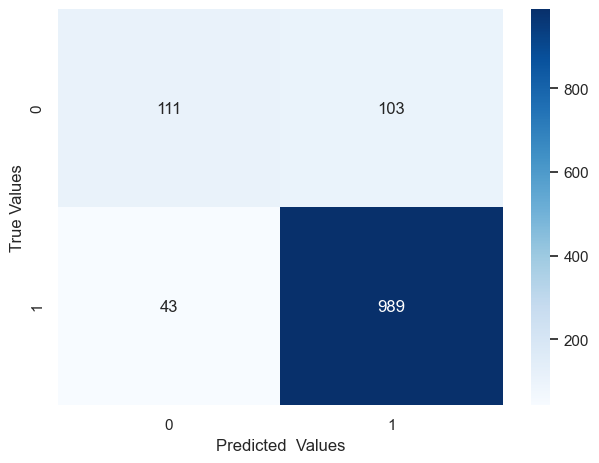

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

cm = confusion_matrix(encoded_y_test, y_pred)

ax = sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g'
)

ax.set(xlabel="Predicted  Values", ylabel="True Values")

print(f"precision: {precision_score(encoded_y_test, y_pred)*100} = {cm[1,1]}/{cm[1,1]} + {cm[0,1]}")
print(f"recall: {recall_score(encoded_y_test, y_pred)*100} = {cm[1,1]}/{cm[1,1]} + {cm[1,0]}")
print('-'*50)
print(label_encoder_name_mapping)

plt.tight_layout()
plt.show()

## grid search

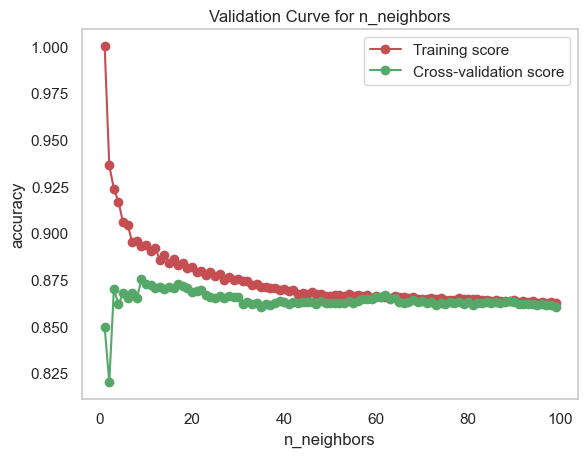

In [12]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1, 100, 1)

hyper_param = 'n_neighbors'
metric = 'accuracy'

train_scores, test_scores = validation_curve(
    knn, X_train, encoded_y_train,
    param_name=hyper_param,
    param_range=param_range,
    cv=5,
    scoring=metric,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.xlabel(hyper_param)
plt.ylabel(metric)
plt.grid()
plt.title(f'Validation Curve for {hyper_param}')
plt.plot(param_range, train_mean, 'o-', label="Training score", color="r")
plt.plot(param_range, test_mean, 'o-', label="Cross-validation score", color="g")
plt.legend(loc="best")
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1, 100, 5),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='f1', cv=5)

grid_search.fit(X_train, encoded_y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_score = grid_search.best_score_
print("Best Cross-Validation Score:", best_score)

best_knn = grid_search.best_estimator_

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Best Cross-Validation Score: 0.927622127458301


In [15]:
import time
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

knn = KNeighborsClassifier(
    n_neighbors=11,
    weights='uniform',
    metric='manhattan'
)

knn.fit(X_train, encoded_y_train)

end = time.time()
true_time = end - start

print('Time to train model: ', true_time)

Time to train model:  0.0009992122650146484


In [16]:
from sklearn.metrics import f1_score

start = time.time()

y_pred = knn.predict(X_test)

end = time.time()
true_time = end - start

print(f"Prediction time: {true_time} seconds")
f1_score(encoded_y_test, y_pred)
print(f"F1 score: {round(f1_score(encoded_y_test, y_pred), 4)*100}%")

Prediction time: 0.055383920669555664 seconds
F1 score: 93.49%


In [17]:
from sklearn.model_selection import cross_validate

decision_tree_result = cross_validate(knn, X_train, encoded_y_train, scoring='f1', cv=5)

print(decision_tree_result['test_score'])
print(f"avg score: {round(decision_tree_result['test_score'].mean()*100, 4)}%")

[0.9235474  0.93643411 0.93291732 0.92189893 0.92331288]
avg score: 92.7622%


[[0.92615385 0.92168675 0.92727273 0.91207154 0.91616766]
 [0.91768293 0.92824427 0.92519084 0.91154423 0.91729323]
 [0.92261002 0.9280245  0.92682927 0.92237443 0.91729323]
 [0.9331307  0.92966361 0.92758089 0.9266055  0.91540785]
 [0.92987805 0.92944785 0.93374422 0.92519084 0.91704374]
 [0.93009119 0.93129771 0.93374422 0.92638037 0.9186747 ]
 [0.92519084 0.93272171 0.93333333 0.91858679 0.91818182]
 [0.93129771 0.92638037 0.93478261 0.92189893 0.91540785]
 [0.92541857 0.93188854 0.93603744 0.9235474  0.91818182]
 [0.9235474  0.93643411 0.93291732 0.92189893 0.92331288]]


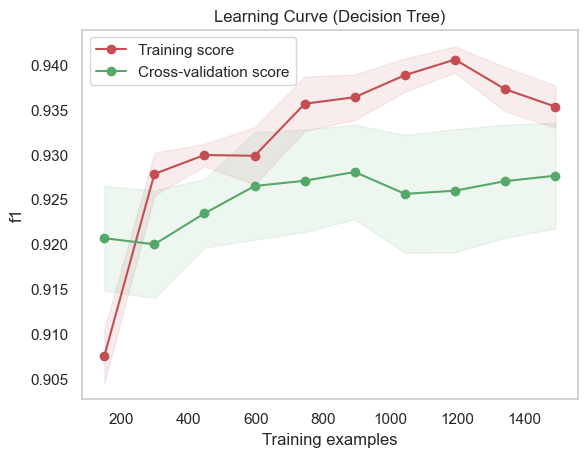

In [18]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(
        knn, X_train, encoded_y_train, cv=None, n_jobs=10, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.title("Learning Curve (Decision Tree)")

plt.xlabel("Training examples")
plt.ylabel("f1")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.1,
                color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score")

plt.legend(loc="best")

print(test_scores)
plt.show()

precision: 89.82142857142857 = 1006/1006 + 114
recall: 97.48062015503875 = 1006/1006 + 26
--------------------------------------------------
{'Biden': 0, 'Trump': 1}


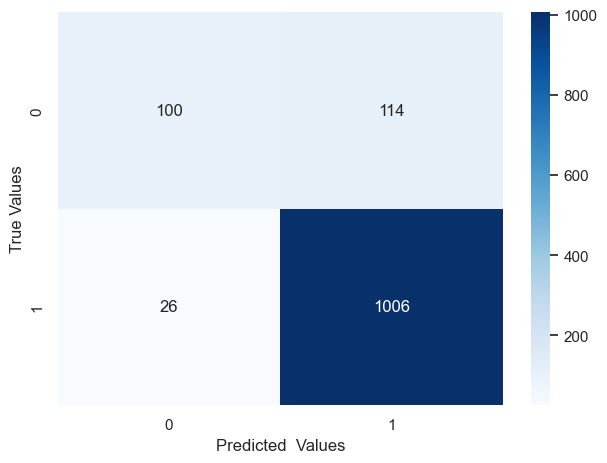

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

cm = confusion_matrix(encoded_y_test, y_pred)

ax = sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g'
)

ax.set(xlabel="Predicted  Values", ylabel="True Values")

print(f"precision: {precision_score(encoded_y_test, y_pred)*100} = {cm[1,1]}/{cm[1,1]} + {cm[0,1]}")
print(f"recall: {recall_score(encoded_y_test, y_pred)*100} = {cm[1,1]}/{cm[1,1]} + {cm[1,0]}")
print('-'*50)
print(label_encoder_name_mapping)

plt.tight_layout()
plt.show()